# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Submitting the Project 
When you are ready to submit your project, collect the following files and compress them into a single archive for upload. Alternatively, you may supply the following files on your GitHub Repo in a folder named boston_housing for ease of access:

- The **boston_housing.ipynb** notebook file with all questions answered and all code cells executed and displaying output.
- An HTML export of the project notebook with the name **report.html.** This file must be present for your project to be evaluated.

Once you have collected these files and reviewed the project rubric, proceed to the project submission page.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [11]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)
display(data.head())


Boston housing dataset has 489 data points with 4 variables each.


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [12]:
#Let's describe my data !
# print data['MEDV'].describe()  useful double check

# TODO: Minimum price of the data
minimum_price = np.min(prices)    #prices.min()

# TODO: Maximum price of the data
maximum_price = np.max(prices)    #prices.max()

# TODO: Mean price of the data
mean_price = np.mean(prices)      #prices.mean()

# TODO: Median price of the data
median_price = np.median(prices)  #prices.median()

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)        #prices.std()

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

- `'RM'` is the average number of rooms among homes in the neighborhood.
'RM' seems a feature indirectly related to the size of the houses in the area. Generally speaking, bigger a house, higher the expected average number of rooms, higher its price. I would guess a direct proportionality between 'RM' feature's values and target's 'MEDV' values. 

- `'LSTAT'` is the percentage of homeowners in the neighborhood considered belonging to a "lower class" (working poor).
'LSTAT' is a feature that,potentially, a wealthy buyer could look as a con. Therefore I'm aspecting an inverse tendency between the value of LSTAT and the price of an home in the area.Lower the' LSTAT' feature's value, higher the market price of an house.

- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.
'PTRATIO' appears as a good characteristic for a neighborhood if its value is low, which potentially emplies more resources for each pupil. I would suggest an encrease in the housing price (higher 'MEDV') related to the decrease of this feature (lower 'PTRATIO').


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [13]:
# TODO: Import 'r2_score'
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    
    from sklearn.metrics import r2_score  #import metric
    score = r2_score(y_true,y_predict)    #compute metric between real target and predicted target
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [14]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**

The determination coefficient ranges between 0 and 1. A R^2 value of 1 would mean that the true values are perfectly predicted by the model . Looking at the relation between the predicted values ("Prediction") made by the model and the target values provided ("True Value") one can see a determination coefficient of 0.92, which is rather close to 1. Because of this result, one can describes this model's predictions as accurate.   

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [55]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

Using all the available datapoints for training (which means a null test_set) :

- makes impossible to have any information about the real performance of our model.
- makes really complicated to identify any "Cause of error " that might be afflicting our model.

A ML model uses a dataset of N datapoints (X,y) to learn how to predict the outcome y given a set of input X. The symbol "X" stands for "features" (important characteristics of the problem considerated ) and the symbol "y" stands for "target" (the label , value or category that we want to predict). To build an efficient model, one should split all the available datapoints in 2 set: "training_set" and "validation_set". During **Training, the model learns a discriminant function**, using an amount of datapoints where both X and y are accessible ("training set"). It updates iteratively its parameters according to a given error score. In other words, the model tries to predict the true label y (y_true) using the given set of features X, producing an output y for each given X (y_predicted). Next,the learning procedure aims to minimaze the error between y_true and y_predicted in order to come up with an accurate decision function. During **Testing, we evaluate how reliable our *trained* model is**,testing its performance on datapoints that the ML model has never seen before("validation_set").The test phase is crucial and occurs after training because it gives information about how well the algorithm is capable of generalizing on new samples (e.g performs "Into the wild"). For this reason, a certain proportion of all the available (X,y) is not used during training, but kept aside to be used during this phase. 

**Using a validation set prevents overfitting**. The "score metric" values might change if our trained model is evaluated on "val_set" or "training_set". A better performance on the "training_set" compared to  the "val_set" might suggest a variance error or overfitting.In this case, the model learns virtually the perfect discriminant function for the training data, but has no capability to generalize and performs poorly on new datapoints. This type of error is impossible to see without the proper dataset splitting in val_set and training_set. Evaluating only the training set in such situations could induce you to think that the model is "good-to-go" while instead performs poorly in real-case scenario. 






----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

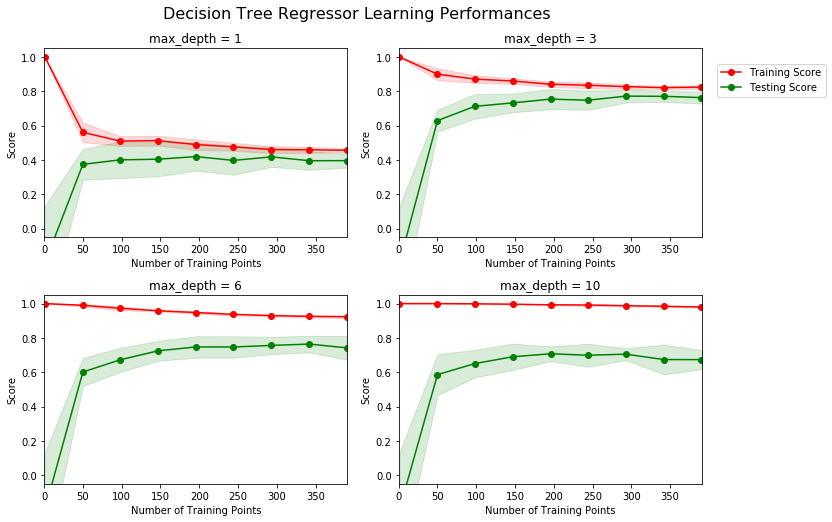

In [16]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)



### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

In all the given models the score for both testing and training level off . This trend suggests that any addiction to the training_set would not impact the performance.
In Max_depth=1 the performance is stable from 50 to 350 datapoints .
In Max_depth=3,6,10 the performance tends to encrease with the number of datapoints added to the training set until 200, before reaching a platou in performance.

**Udacity Reviewer add**
As in the initial phases, the training score decreasing and testing score increasing makes sense, since with little amounts of the data we simply memorize the training data(no generalization), then when we receive more and more data points we can't simply memorize the training data and we start to generalize better(higher testing accuracy).As in the beginning it is beneficial, but at the end if we look at the testing curve here, we can clearly see that it has converged to / started to diverge from its optimal score, so more data is not necessary in any of these graphs.

Also note that in practice collecting more data can often be time consuming and/or expensive, so when we can avoid having to collect more data the better. Therefore sometimes receiving very minor increases in performance is not beneficial, which is why plotting these curves can be very critical at times.


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

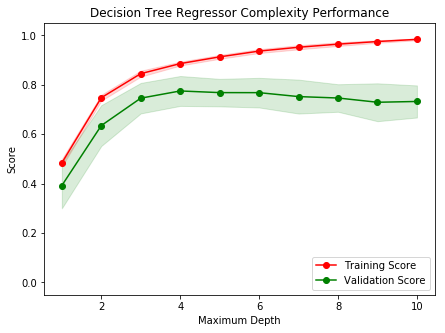

In [17]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

The performance of the model changes with its complexity .
- **The max_depht = 1 **:**Underfitting**. This is a too simple model and it is not appropriate to fit the data, which in turns means low performance_score in both training and validation curves (High Bias). 

- **The max_depth = 10 **:**Overfitting**.This is a too complex model. The gap between a very high training_score and a consistently lower validation_score pinpoints a model with high sensitivity for the training data that do not generalize well (High Variance) .

**Udacity Reviewer add**
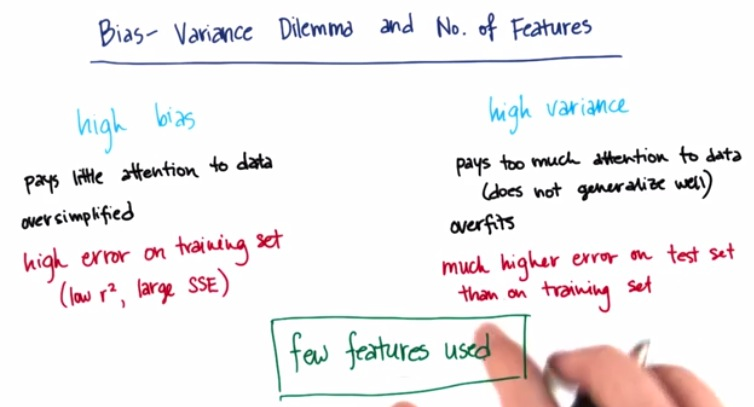


### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

**The max_depth=4** : **good fit** for the dataset.
it reaches almost the same (fairly good)performance in test and train. its performance score is higher then max_depth= 3 or 5 and the gap between validation score and training score is small (around 0.1). 

**Udacity Reviewer add**
Spot on with your ideas! Either 3 or 4 are acceptable(I would choose 4 as well)

1. As a max depth of 4 does have a higher validation score(which is what gridSearch searches for)
2. But maybe a max depth of 3 has a better bias / variance tradeoff(with closer training and validation scores), also a simpler model, which is what is recommend based on Occam's razor

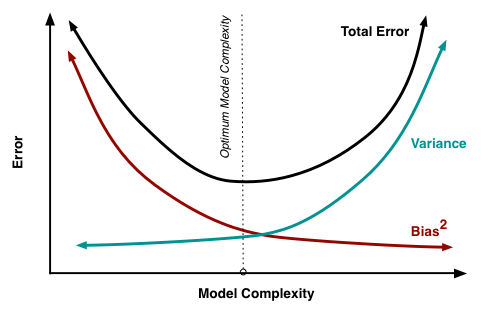

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

Selecting a classifier usually means define also the hyperparameters that have to be used with it (e.g for SVM one should define "C" values ). The "parameter selection" process could be a complex problem, due to the fact that hyperparameters tuning depends on the dataset and problem considerated. 
The "Grid Search" technique consists in scanning a certain range of possible values of hyperparameters iteratively and exaustively (which means evaluating all the possible values in the given range), in order to select those that allow the best  classifier performance on the validation set according to some given metric.


### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

The K-fold Cross Validation is a technique that allows us to have an higher number of training data without compromising on test-set size. The K fold alg. split the entire dataset in K subset (or folds), using iteratively one of the fold as test_set and combining the others to have a training_set.The overall performance is given as the score-average of the K trained classifier.Using this technique allow the model to see each sample in the whole dataset as both test and train and , despite the overall increment of time complexity , it gives the best performance possible.

Benefit in the grid search + CV :
without cross-validation a grid search could end up choosing the parameters that are the best fit for the given test-set but not in general (overfitting over the test set), averaging the score across all possible test_set would prevent it, forcing the hyperparameters choice towards a more "general" solution .




In [18]:
#Let's code:
from sklearn import grid_search
from sklearn import svm

param={'C':[1e4,1e5,1e6],
      'gamma':[0.001,0.0001,0.005,0.0005],
      'kernel':['rbf','sigmoid','poly']}

clf=grid_search.GridSearchCV(svm.SVC(), param)
clf.fit(X_train,y_train)

print clf.best_estimator_

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


SVC(C=10000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


**Udacity Reviewer add**

Just to have a working code sample

In [54]:
# Let's code with your reviewer
if False:
 import numpy as np
 from sklearn import cross_validation
 from sklearn import datasets
 from sklearn import svm

 iris = datasets.load_iris()

 # Split the iris data into train/test data sets with 30% reserved for testing
 X_train, X_test, y_train, y_test = cross_validation.train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

 # Build an SVC model for predicting iris classifications using training data
 clf = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train, y_train)

 # Now measure its performance with the test data with single subset
 print clf.score(X_test, y_test) 

 # We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
 scores = cross_validation.cross_val_score(clf, iris.data, iris.target, cv=5)

 # Print the accuracy for each fold:
 print scores

 # And the mean accuracy of all 5 folds:
 print scores.mean()


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [20]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
      decision tree regressor trained on the input data [X, y]. """
    
    #import 
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import make_scorer, mean_absolute_error
    from sklearn import grid_search
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)  
    # "random_state" could be any number: regressor = DecisionTreeRegressor(random_state = "any number")

    
    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid =grid_search.GridSearchCV(regressor,params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [52]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

The optimal "maximum depth" value is 4. This result agrees with the answer 6.


### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [60]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
   print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

#print 
print "Regressor score value is: {: .2f}".format(reg.score(X_train,y_train))

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67
Regressor score value is:  0.87


**Answer: **
Each client should sell his house around the $ predicted as "selling price" by the model, because are reasonable prices.MOreover the overall score reached by the regressor is 0.87 which is quite high.

- **Comparing model results with data exploration section. **

From the data exploration section we can say that a) "RM" is a feature that I'm expecting to surge with the house market value, while I'm expecting the opposite for "LSTAT" and "PTRATEO" b)The mean house price is $ 454,343. 
Looking at the client data we see that Client 2 has the worst features values (lowest RM, highest LSTAT and PTRATIO) among the three and that Client 3 has the best features values (highest RM, lowest LSTAT and PTRATEO). Following this hints, we could suggest a low selling price for Client 2 (definitely lower than the mean house value) an high selling price for Client 3 (definitely higher than the mean house value) and a price between those two for Client 1. These predictions are aligned with our model suggestions. 

**Udacity Reviewer add**
We can visualize the client price collocation plotting an hist of our dataset prices and the predicted price for each of the clients' house. 

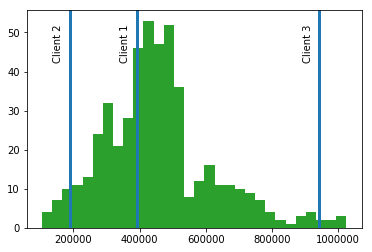

In [66]:
# 2) Hist
import matplotlib.pyplot as plt
for i,price in enumerate(reg.predict(client_data)):
    #plt prices hist
    plt.hist(prices, bins = 30)
    
    #add client predicted price
    plt.axvline(price, lw = 3)   
    plt.text(price-50000, 50, 'Client '+str(i+1), rotation=90)


**Answer**
- **Comparing the model results with a deeper data exploration.**(code section below.)

We could analyze further the imported data, to see if our model suggestions are reasonable. We could take a look at:   
1. the graphical representation of price and features
2. the global data stastistics

As one can see in the graph, the % of low income families is a more discriminative feature compare to the other two, when it comes to determine the selling price of an house. An hint of this phenomenon lays in "LSTAT" standard deviation, which has the highest value (std = 7). 

From the global statistics, we could analize quantitatively in which quartile the clients' features belong:
1. Client 3) 
"PTRATEO" and "LSTAT" values belong to the first quartile (25%) and "RM" values belong to the third (75%).
Client 3' house has a good position in all the characteristic

2. Client 1 )
"PTRATEO" and "RM" values belong to the third quartile (75%) and "LSTAT" values belong to the first (25%).Client 1' house have a good score in the most valuable characteristic: "LSTAT"
3. Client 2 ) 
"PTRATEO" and "LSTAT" values belong to the first quartile (25%) and "RM" values belong to the third (75%). Client 2 has a low score in each of the characteristic evaluated

Also with a closer look, all our model predictions seems solid but the importance of "LSTAT" characteristic emerge. 


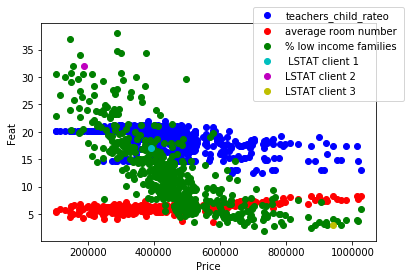

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [63]:
# 1) features- prices stats
import matplotlib.pyplot as plt 

# Plotting the features and the house prices
plt.plot(prices,features['PTRATIO'],'o',color='b',label="teachers_child_rateo")
plt.plot(prices,features['RM'],'o',color='r',label="average room number ")
plt.plot(prices,features['LSTAT'],'o',color='g',label="% low income families")   

#plotting on the map the client 1-2-3 LSTAT
if True:
 plt.plot([391183],[17],'o',color='c',label=" LSTAT client 1")
 plt.plot([189123],[32],'o',color='m',label="LSTAT client 2")
 plt.plot([942666],[3],'o',color='y',label="LSTAT client 3")


# Plot aesthetics
plt.ylabel("Feat")
plt.xlabel("Price")
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()

# 2) data statistics
# Report data Stats
data.describe()

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [164]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

The model performs fairly on the dataset but it is too simple to be effective in a real case scenario. Generally speaking it depends on the question that the models it is trying to predict and the datapoints available to train the model. Given a set of features it might be possible produce a "specific" prediction such us "what's the house selling price in boston during 1978? " but it is more complicated answer a less circumstantial question such as "what's the house selling price?". Moreover, the same number of features (506) might or might not be relevant to answer the considerated question.  


The data are collected in just one city (Boston) in a certain year (1978) and there are possible useful characteristics (such us "square meters" and "number of windows" or "number of bathrooms") not available. Another importan point is the predictions' range , which is roughly the 15% of the 10 predictions averaged , might indicate some consistency problem in our model. Therefore one has to pay attention to the fact that:
1. data might not be useful to predict the house values today or in a rural city.
2. We could have an underfitting problem in case the features/datapoints are not sufficient to train the given model. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.